<font size=5>**Naive Bayes Algorithm**</font>

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors.

Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The data is taken from the UCI Machine Learning Repository and it contains different features extracted from images that were taken for the evaluation of an authentication procedure for banknotes.

Information about the dataset:
It contains four features and the class.

Variance of Wavelet Transformed image (vwti) - continuous
Skewness of Wavelet Transformed image (swti) - continuous
Curtosis of Wavelet Transformed image (cwti) - continuous
Entropy of image (eoi) - continuous
Class - banknote is authenticated (1) ot not (0) - integer

In [3]:
header =['variance','skewness','curtosis','entropy','authenticated']
df =pd.read_csv('C:\\Users\POOJA\Downloads\python\Projects\\Naive Bayes\\data_banknote_authentication.txt',delimiter =',',names=header)
df

,variance,skewness,curtosis,entropy,authenticated
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


**Model Training**

In [5]:
x=df.iloc[:,:4].values
y=df.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

So far we’ve seen the computations when the X’s are categorical. But how to compute the probabilities when X is a continuous variable?

If we assume that the X follows a particular distribution, then you can plug in the probability density function of that distribution to compute the probability of likelihoods.

If you assume the X’s follow a Normal (aka Gaussian) Distribution, which is fairly common, we substitute the corresponding probability density of a Normal distribution and call it the Gaussian Naive Bayes. You need just the mean and variance of the X to compute this formula.`

In [10]:
nb=nb.fit(x_train,y_train)

In [12]:
#Predictinf if bank note is authenticated or not using test data
y_pred = nb.predict(x_test)

In [17]:
# let's preduct authentication for new sample
nb.predict([[5.591200,3.01290,-1.728880,-3.564210]])

array([0], dtype=int64)

In [18]:
nb.predict([[-2.541900,-0.65804,2.684200,1.195200]])

array([1], dtype=int64)

**Evaluation metrics for Model**

In [19]:
from sklearn import metrics
cnf = metrics.confusion_matrix(y_test,y_pred)
cnf

array([[134,  23],
       [ 23,  95]], dtype=int64)

Text(0.5,1,'Confusion matrix')

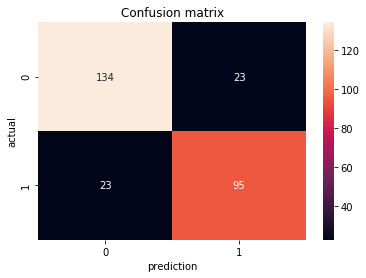

In [23]:
import seaborn as sns
fig,ax= plt.subplots()
sns.heatmap(cnf,annot=True,fmt='g')
#ax.xaxis.set_label_position("top")
ax.set_xlabel('prediction')
ax.set_ylabel('actual')
ax.set_title('Confusion matrix')

In [24]:
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.85      0.85      0.85       157
          1       0.81      0.81      0.81       118

avg / total       0.83      0.83      0.83       275



In [31]:
print('accuracy_score=',metrics.accuracy_score(y_test,y_pred))

accuracy_score= 0.8327272727272728


We have 83% accuracy score that means our model is sucessful

In [26]:
y_proba = nb.predict_proba(x_test)[:,1]

In [29]:
#lets predict probabilities of authentication
nb.predict_proba([[-2.541900,-0.65804,2.684200,1.195200]])

array([[0.06692863, 0.93307137]])

new sample has 93% probability that banknote isnt authenticated 

**ROC Curve**

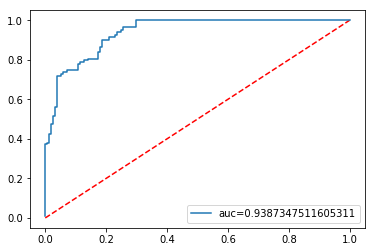

In [30]:
import matplotlib.pyplot as plt
% matplotlib inline
fpr,tpr,_= metrics.roc_curve(y_test,y_proba)
auc= metrics.roc_auc_score(y_test,y_proba)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)